In [4]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/pipelines/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

from bioomics import QueryComplex
from plot_seq import PlotSeq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [138]:
query = "select * from view_antibody;"
df = QueryComplex(True).list_data(query, True)
df['specie'] = df['specie'].map(lambda x: x.replace('_', ' '))
chain_types = {'H': 'Heavy', 'K': 'Kappa', 'L': 'Lambda',}
df['chain_type'] = df['chain_type'].map(lambda x: chain_types[x] if x in chain_types else x)
print(len(df))
df.head()

31529


,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,chain_id,model_no,chain_no,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,relative_pdb,pdb_group
0,IGHV3S65*01,Vicugna pacos,IGHV3S65,IGHV3S65,Heavy,5U4M,5U4M_0_B_0,0,B,73359,NAQVQLVESGGGLVQPGGSLRLSCVASEFSRFTLDYYAIGWFRQAP...,129,2017-12-13,x-ray diffraction,2.50,82.0962,meta_chain_faa/5U/5U4M/5U4M_0_B_0.faa,meta_chain_pdb/5U/5U4M/5U4M_0_B_0.pdb,20.0
1,IGKV2-137*01,Mus musculus,IGKV2-137,IGKV2,Kappa,9U4W,9U4W_0_S_0,0,S,158287,VQLVESGGGLVQPGGSRKLSCSASGFAFSSFGMHWVRQAPEKGLEW...,232,2025-06-11,electron microscopy,3.18,87.6148,meta_chain_faa/9U/9U4W/9U4W_0_S_0.faa,meta_chain_pdb/9U/9U4W/9U4W_0_S_0.pdb,20.0
2,IGKV2-137*01,Mus musculus,IGKV2-137,IGKV2,Kappa,9U4Y,9U4Y_0_S_0,0,S,158287,VQLVESGGGLVQPGGSRKLSCSASGFAFSSFGMHWVRQAPEKGLEW...,232,2025-06-11,electron microscopy,2.67,61.0807,meta_chain_faa/9U/9U4Y/9U4Y_0_S_0.faa,meta_chain_pdb/9U/9U4Y/9U4Y_0_S_0.pdb,20.0
3,IGKV2-30*01,Homo sapiens,IGKV2-30,IGKV2,Kappa,8U4S,8U4S_0_L_0,0,L,55847,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYTDGNTYLNWFQQRPG...,110,2024-03-13,electron microscopy,3.35,88.0813,meta_chain_faa/8U/8U4S/8U4S_0_L_0.faa,meta_chain_pdb/8U/8U4S/8U4S_0_L_0.pdb,20.0
4,IGHV1-18*01,Homo sapiens,IGHV1-18,IGHV1,Heavy,8U4S,8U4S_0_H_0,0,H,70000,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGIE...,125,2024-03-13,electron microscopy,3.35,75.3002,meta_chain_faa/8U/8U4S/8U4S_0_H_0.faa,meta_chain_pdb/8U/8U4S/8U4S_0_H_0.pdb,20.0


In [139]:
df['specie'].value_counts()

specie
Homo sapiens             14462
Mus musculus              9073
Vicugna pacos             3278
Macaca mulatta            1348
Gorilla gorilla           1074
Pongo pygmaeus             595
Oryctolagus cuniculus      483
Pongo abelii               367
Rattus norvegicus          274
Bos taurus                 159
Macaca fascicularis        116
Lemur catta                110
Gallus gallus               75
Sus scrofa                  52
Mus spretus                 24
Canis lupus                 12
Mustela putorius             8
Felis catus                  7
Camelus dromedarius          5
Equus caballus               3
Capra hircus                 2
Ovis aries                   2
Name: count, dtype: int64

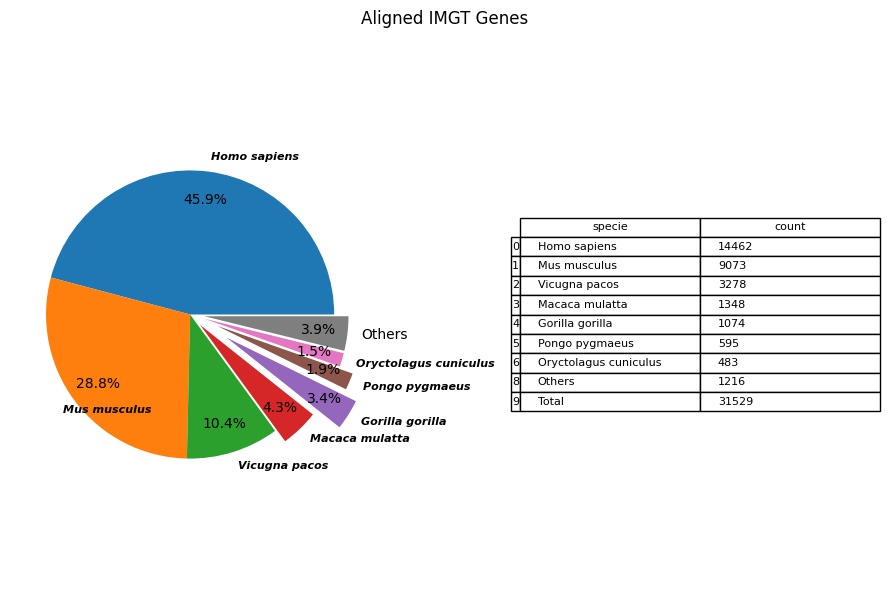

In [140]:
n = 7
explode = [0, 0, 0, .1, .3, .2, .1, .1]
args = {'angle': 0, 'ha': 'left', 'pctdistance':.8, 'labeldistance':1.1, }
PlotSeq.pie_species(df, n, explode, args)

['Homo sapiens', 'Mus musculus']


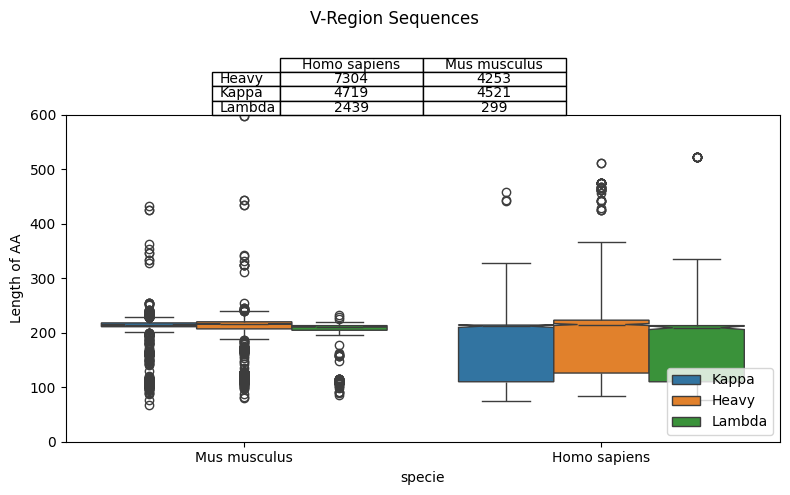

(        allele_name        specie  gene_name gene_family chain_type pdb_id  \
 1      IGKV2-137*01  Mus musculus  IGKV2-137       IGKV2      Kappa   9U4W   
 2      IGKV2-137*01  Mus musculus  IGKV2-137       IGKV2      Kappa   9U4Y   
 3       IGKV2-30*01  Homo sapiens   IGKV2-30       IGKV2      Kappa   8U4S   
 4       IGHV1-18*01  Homo sapiens   IGHV1-18       IGHV1      Heavy   8U4S   
 5       IGKV2-30*01  Homo sapiens   IGKV2-30       IGKV2      Kappa   8U4S   
 ...             ...           ...        ...         ...        ...    ...   
 31521    IGHV2-2*03  Mus musculus    IGHV2-2       IGHV2      Heavy   5IOP   
 31522   IGKV6-32*01  Mus musculus   IGKV6-32       IGKV6      Kappa   6PYC   
 31524  IGKV13-84*01  Mus musculus  IGKV13-84      IGKV13      Kappa   8PY4   
 31526  IGKV1-110*01  Mus musculus  IGKV1-110       IGKV1      Kappa   5Y9F   
 31528   IGHV3-53*01  Homo sapiens   IGHV3-53       IGHV3      Heavy   9CFF   
 
          chain_id  model_no chain_no  pro_id  \
 

In [141]:
top_names = list(df['specie'].value_counts()[:2].index)
print(top_names)
sdf = df[df['specie'].isin(top_names)]
PlotSeq.plot_summary(sdf)

### human

(14462, 19)


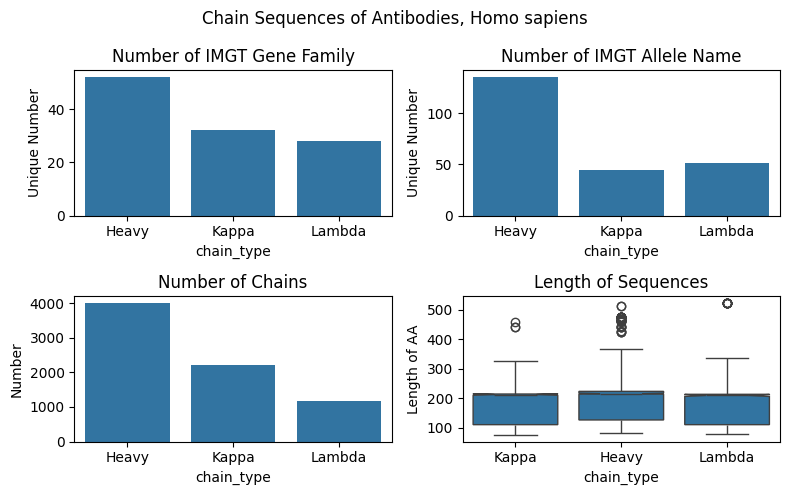

In [142]:
specie = "Homo sapiens"
PlotSeq.plot_summary_specie(df, specie)

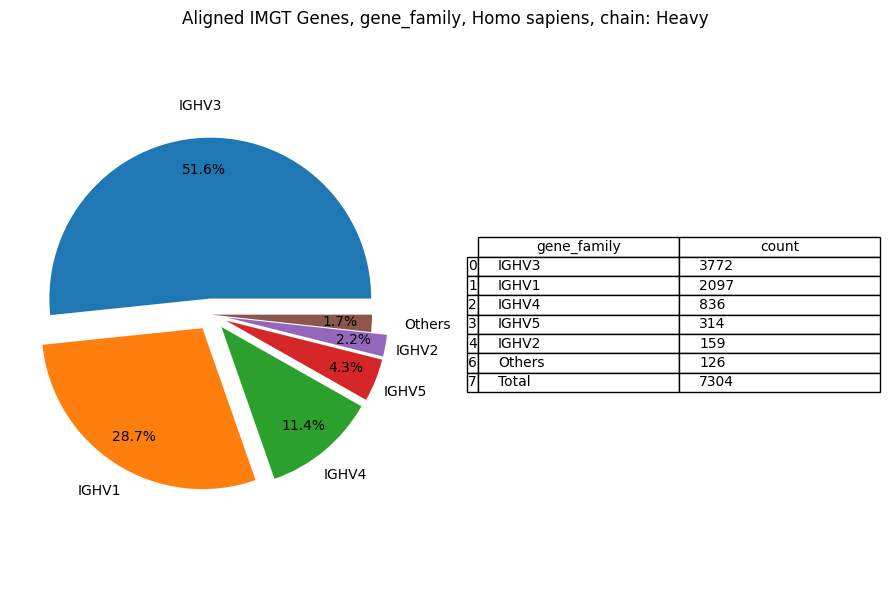

In [144]:
# most abundant IMGT gene names
specie = "Homo sapiens"
chain_type = 'Heavy'
key = 'gene_family'
n = 5
args = {'explode_unit': .1, 'angle':0, 'ha':'center', 'pctdistance':.8,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

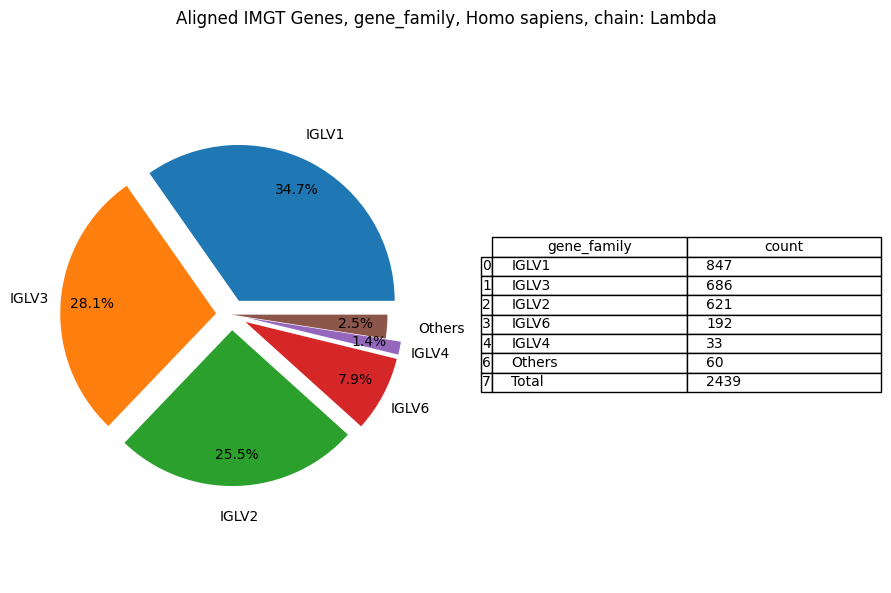

In [145]:
# most abundant IMGT gene names
specie = "Homo sapiens"
chain_type = 'Lambda'
key = 'gene_family'
n = 5
args = {'explode_unit': .1, 'angle':0, 'ha':'center', 'pctdistance':.8,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

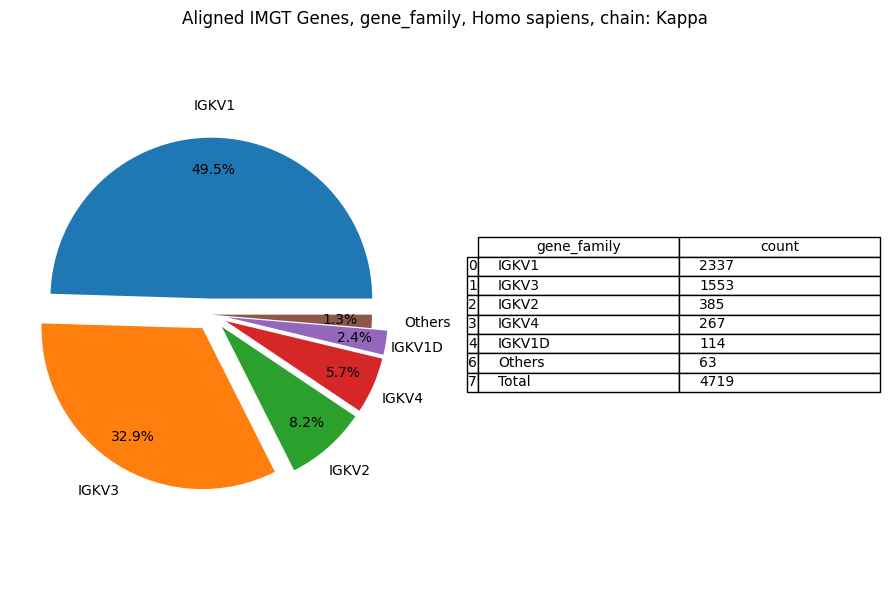

In [146]:
# most abundant IMGT gene names
specie = "Homo sapiens"
chain_type = 'Kappa'
key = 'gene_family'
n = 5
args = {'explode_unit': .1, 'angle':0, 'ha':'center', 'pctdistance':.8,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

### mouse

(9073, 19)


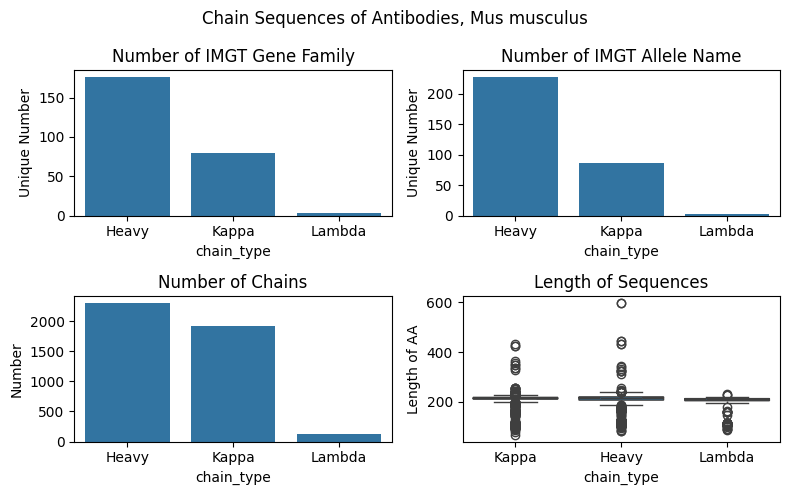

In [147]:
specie = "Mus musculus"
PlotSeq.plot_summary_specie(df, specie)

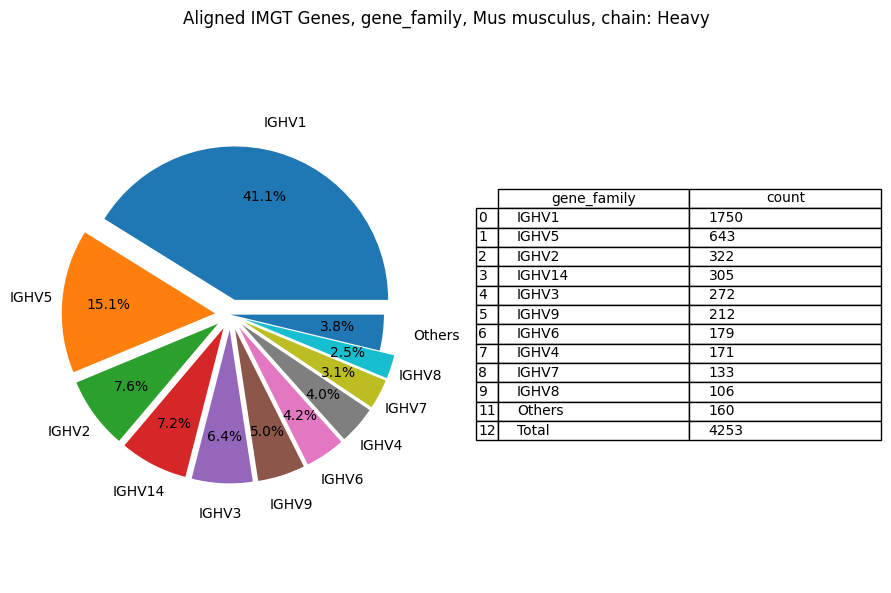

In [166]:
# most abundant IMGT gene names
specie = "Mus musculus"
chain_type = 'Heavy'
key = 'gene_family'
n = 10
args = {'explode_unit': 0.1, 'angle':0, 'ha':'center', 'pctdistance':.7,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

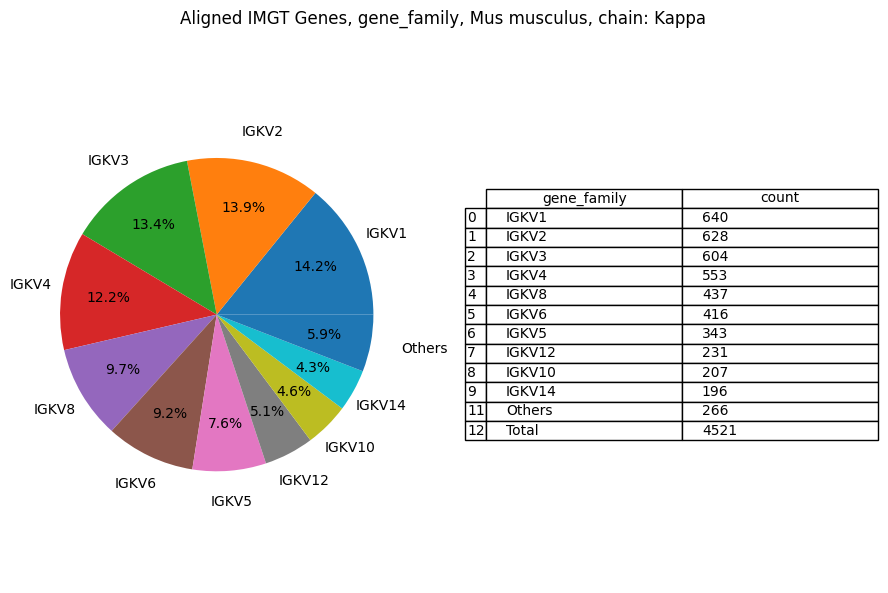

In [164]:
specie = "Mus musculus"
chain_type = 'Kappa'
key = 'gene_family'
n = 10
args = {'explode_unit': 0, 'angle':0, 'ha':'center', 'pctdistance':.7,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

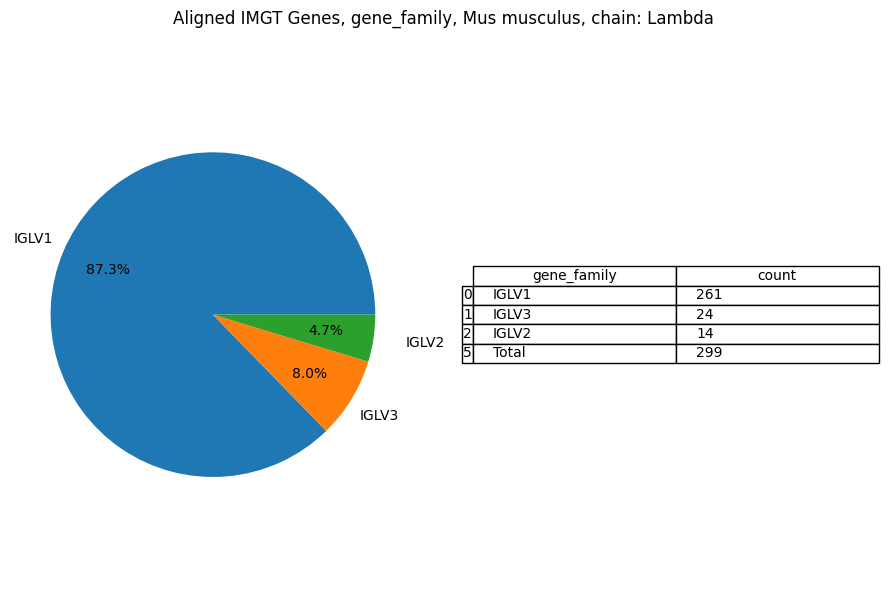

In [163]:
specie = "Mus musculus"
chain_type = 'Lambda'
key = 'gene_family'
n = 3
args = {'explode_unit': 0, 'angle':0, 'ha':'center', 'pctdistance':.7, 'labeldistance':1.2}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)